In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
apr = pd.read_excel("Order April.xls")
jul = pd.read_excel("Order July.xls")
jun = pd.read_excel("Order June.xls")
may = pd.read_excel("Order May.xls")
mar = pd.read_excel("Orer March.xls")

### Data yg di ambil adalah
- No Pesanan
- Status Pesanan
- Nama Produk 
- Nama Variasi
- Harga setelah diskon 
- Jumlah
- Potongan koin Shopee
- Ongkos kirim Dibayar Oleh Pembeli
- Total Pembayaran
- Username
- Kota/Kabupaten
- Waktu Pembayaran Dilakukan
- Waktu Pesanan Dibuat

In [3]:
frames = [mar,apr,may,jun,jul]
df = pd.concat(frames)

In [4]:
df.reset_index(drop=True,inplace=True)

In [5]:
df = df[['No. Pesanan','Status Pesanan', 'Nama Produk', 'Nama Variasi', 
    'Harga Setelah Diskon', 'Jumlah', 'Potongan Koin Shopee', 'Ongkos Kirim Dibayar oleh Pembeli', 'Total Pembayaran',
        'Username (Pembeli)', 'Kota/Kabupaten']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646 entries, 0 to 4645
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   No. Pesanan                        1256 non-null   object 
 1   Status Pesanan                     1256 non-null   object 
 2   Nama Produk                        4646 non-null   object 
 3   Nama Variasi                       3846 non-null   object 
 4   Harga Setelah Diskon               4646 non-null   object 
 5   Jumlah                             4646 non-null   int64  
 6   Potongan Koin Shopee               1256 non-null   float64
 7   Ongkos Kirim Dibayar oleh Pembeli  1256 non-null   object 
 8   Total Pembayaran                   1256 non-null   object 
 9   Username (Pembeli)                 1256 non-null   object 
 10  Kota/Kabupaten                     1256 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 399.4+ 

In [7]:
df

,No. Pesanan,Status Pesanan,Nama Produk,Nama Variasi,Harga Setelah Diskon,Jumlah,Potongan Koin Shopee,Ongkos Kirim Dibayar oleh Pembeli,Total Pembayaran,Username (Pembeli),Kota/Kabupaten
0,200302R7G0BX8D,Selesai,Kanvas lukis anak / small canvas for kids / ka...,30x30,Rp 17.500,1,0.0,Rp 9.000,Rp 26.500,usako,KOTA JAKARTA BARAT
1,200302RM4QP8U8,Batal,Giotto super washable finger paint share in bo...,"Merah,100ml",Rp 20.000,1,0.0,Rp 12.000,Rp 92.000,hannamargarethtampubolon,KOTA BANDUNG
2,NaN,NaN,Giotto super washable finger paint share in bo...,"Kuning,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Giotto super washable finger paint share in bo...,"Biru,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Giotto super washable finger paint share in bo...,"Hijau,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4641,NaN,NaN,Giant waterbeads sensory play hidrogel jumbo/ ...,"Jumbo/giant,25 gram",Rp 13.000,1,NaN,NaN,NaN,NaN,NaN
4642,2007259YW67JHH,Selesai,Giant waterbeads sensory play hidrogel jumbo/ ...,"Standar,25 gram",Rp 6.500,1,0.0,Rp 32.000,Rp 116.500,liftia10,KOTA JAKARTA SELATAN
4643,NaN,NaN,Giant waterbeads sensory play hidrogel jumbo/ ...,"Jumbo/giant,25 gram",Rp 13.000,1,NaN,NaN,NaN,NaN,NaN
4644,NaN,NaN,Die cast metal construction figurine / mainan ...,B,Rp 35.000,1,NaN,NaN,NaN,NaN,NaN


In [8]:
x = df['Nama Produk'].loc[0]
y = df['Nama Variasi'].loc[0]

In [9]:
x.split()[0] + ' ' +  x.split()[1] + ' ' + y

'Kanvas lukis 30x30'

In [10]:
x = []
for item in df['Nama Produk']:
    splitan = item.split()[0] + ' ' +  item.split()[1]
    x.append(splitan)

In [11]:
df['Nama Produk'] = x

In [12]:
df['Nama Produk'].values

array(['Kanvas lukis', 'Giotto super', 'Giotto super', ...,
       'Giant waterbeads', 'Die cast', '200 gram'], dtype=object)

In [13]:
x = df['Nama Produk'].values
y = df['Nama Variasi']

## Ubah nama 
- Sensory rice --> Sensory Rice Ocean
- 200 gram --> Sensory Rice 200 gram 
- 10 gram + Instant Snow --> Instant Snow
- Sensory play + Giant Waterbeads + 50g 25g + 50g sensory + Kitsofhappiness - + 50g waterbeads --> Giant Waterbeads
- Sponge brush + Roller sponge --> Sponge Brush

In [14]:
def applyProduk2(x):
    if x == 'Sensory rice':
        return 'Sensory Rice Ocean'
    elif x == '200 gram':
        return 'Sensory Rice 200 gram'
    elif x == '10 gram':
        return 'Instant snow'
    elif x == 'Sensory play':
        return 'Giant waterbeads'
    elif x == '50g 25g':
        return 'Giant waterbeads'
    elif x == '50g sensory':
        return 'Giant waterbeads'
    elif x == 'Kitsofhappiness -':
        return 'Giant waterbeads'
    elif x == '50g waterbeads':
        return 'Giant waterbeads'
    elif x == 'Roller sponge':
        return 'Sponge brush'
    else :
        return x

In [15]:
def applyProduk(x):
    if x['Nama Produk'] == 'Sensory rice':
        return 'Sensory Rice Ocean'
    elif x['Nama Produk'] == '200 gram':
        return 'Sensory Rice 200 gram'
    elif x['Nama Produk'] == '10 gram':
        return 'Instant snow'
    elif x['Nama Produk'] == 'Sensory play':
        return 'Giant waterbeads'
    elif x['Nama Produk'] == '50g 25g':
        return 'Giant waterbeads'
    elif x['Nama Produk'] == '50g sensory':
        return 'Giant waterbeads'
    elif x['Nama Produk'] == 'Kitsofhappiness -':
        return 'Giant waterbeads'
    elif x['Nama Produk'] == '50g waterbeads':
        return 'Giant waterbeads'
    elif x['Nama Produk'] == 'Roller sponge':
        return 'Sponge brush'
    else :
        return x

In [16]:
df['Nama Produk'] = df['Nama Produk'].apply(applyProduk2)

In [17]:
df['Nama Produk'].value_counts()

Cat lukis                    2138
Giant waterbeads              489
Kanvas lukis                  338
Giotto super                  274
Animal play                   237
Sensory Rice 200 gram         172
Deli washable                 136
Instant snow                  136
Montessori tray               113
Sponge brush                  101
50-100pcs pompom               90
Sort the                       84
Wipe and                       53
Feed the                       45
Painting set                   44
Coding and                     39
DIY metamorfosis               32
Scooper scissors               24
Mathematical Intelligence      19
Busy jar                       18
Meet the                       14
Sensory Rice Ocean             14
Die cast                       12
Boneka talking                 11
Wooden counters                10
Wooden rail                     3
Name: Nama Produk, dtype: int64

In [18]:
df_new = df.copy()

In [19]:
df_new['Waktu Pembayaran'] = pd.concat(frames)['Waktu Pembayaran Dilakukan'].values

In [20]:
df_new['Pesanan Dibuat'] = pd.concat(frames)['Waktu Pesanan Dibuat'].values

In [21]:
df_new.to_csv('Processing Data.csv')

In [22]:
df_new

,No. Pesanan,Status Pesanan,Nama Produk,Nama Variasi,Harga Setelah Diskon,Jumlah,Potongan Koin Shopee,Ongkos Kirim Dibayar oleh Pembeli,Total Pembayaran,Username (Pembeli),Kota/Kabupaten,Waktu Pembayaran,Pesanan Dibuat
0,200302R7G0BX8D,Selesai,Kanvas lukis,30x30,Rp 17.500,1,0.0,Rp 9.000,Rp 26.500,usako,KOTA JAKARTA BARAT,2020-03-02 14:18,2020-03-02 14:18
1,200302RM4QP8U8,Batal,Giotto super,"Merah,100ml",Rp 20.000,1,0.0,Rp 12.000,Rp 92.000,hannamargarethtampubolon,KOTA BANDUNG,-,2020-03-02 18:04
2,NaN,NaN,Giotto super,"Kuning,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Giotto super,"Biru,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Giotto super,"Hijau,100ml",Rp 20.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4641,NaN,NaN,Giant waterbeads,"Jumbo/giant,25 gram",Rp 13.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4642,2007259YW67JHH,Selesai,Giant waterbeads,"Standar,25 gram",Rp 6.500,1,0.0,Rp 32.000,Rp 116.500,liftia10,KOTA JAKARTA SELATAN,2020-07-25 09:33,2020-07-25 09:31
4643,NaN,NaN,Giant waterbeads,"Jumbo/giant,25 gram",Rp 13.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4644,NaN,NaN,Die cast,B,Rp 35.000,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 10 Produk Unggulan Kit of Happines

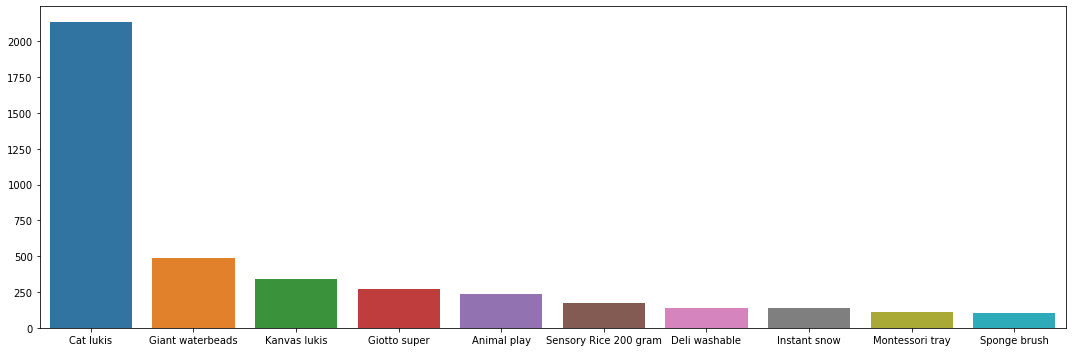

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(y = df_new['Nama Produk'].value_counts().head(10).values,x=df_new['Nama Produk'].value_counts().head(10).index)
plt.tight_layout()

In [24]:
df_new['Nama Produk'].value_counts().head(10)

Cat lukis                2138
Giant waterbeads          489
Kanvas lukis              338
Giotto super              274
Animal play               237
Sensory Rice 200 gram     172
Deli washable             136
Instant snow              136
Montessori tray           113
Sponge brush              101
Name: Nama Produk, dtype: int64

## Perhitungan RFM

In [25]:
df_rfm = df_new[df_new['Status Pesanan'] == 'Selesai']

In [26]:
df_rfm['Pesanan Dibuat'] = pd.to_datetime(df_rfm['Pesanan Dibuat'])
df_rfm['Waktu Pembayaran'] = pd.to_datetime(df_rfm['Waktu Pembayaran'])

In [27]:
df_rfm.head()

,No. Pesanan,Status Pesanan,Nama Produk,Nama Variasi,Harga Setelah Diskon,Jumlah,Potongan Koin Shopee,Ongkos Kirim Dibayar oleh Pembeli,Total Pembayaran,Username (Pembeli),Kota/Kabupaten,Waktu Pembayaran,Pesanan Dibuat
0,200302R7G0BX8D,Selesai,Kanvas lukis,30x30,Rp 17.500,1,0.0,Rp 9.000,Rp 26.500,usako,KOTA JAKARTA BARAT,2020-03-02 14:18:00,2020-03-02 14:18:00
5,200302RMDNAAYM,Selesai,Giotto super,"Merah,100ml",Rp 20.000,1,0.0,Rp 12.000,Rp 92.000,hannamargarethtampubolon,KOTA BANDUNG,2020-03-02 18:09:00,2020-03-02 18:09:00
9,200302S271WQR1,Selesai,Deli washable,NaN,Rp 53.000,1,0.0,Rp 0,Rp 53.000,inooydhewi,KAB. KARAWANG,2020-03-02 22:16:00,2020-03-02 22:16:00
10,200303TVV6M5MX,Selesai,Giotto super,"Kuning,20ml",Rp 5.500,1,0.0,Rp 0,Rp 16.500,maya1990,KAB. BOGOR,2020-03-03 15:46:00,2020-03-03 15:46:00
13,20030405XEK14E,Selesai,Giotto super,"Merah,100ml",Rp 20.000,2,0.0,Rp 49.000,Rp 191.395,sherlyshopid,KOTA TANGERANG,2020-03-04 14:33:00,2020-03-04 14:33:00


In [28]:
x = df_rfm['Total Pembayaran'].loc[13]

In [29]:
def applyInt(x):
    return int(x.split()[1].split('.')[0] + x.split()[1].split('.')[1])

In [30]:
df_rfm['Total Pembayaran'] = df_rfm['Total Pembayaran'].apply(applyInt)

In [31]:
def applyInt2(x):
    if x == 'Rp 0':
        return 0 
    else :
        return int(x.split()[1].split('.')[0] + x.split()[1].split('.')[1])

In [32]:
df_rfm['Ongkos Kirim Dibayar oleh Pembeli'] = df_rfm['Ongkos Kirim Dibayar oleh Pembeli'].apply(applyInt2)

In [33]:
from datetime import timedelta

# Calcuation Monetary
df_rfm['TotalSum'] = df_rfm['Total Pembayaran'] - df_rfm['Ongkos Kirim Dibayar oleh Pembeli'] - df_rfm['Potongan Koin Shopee']

# Calculation Recency 
snapshot_date = df_rfm['Pesanan Dibuat'].max() + timedelta(days=1)

# Grouping by CustomerID
## and Calculation frequency 
df_rfm = df_rfm.groupby(['Username (Pembeli)']).agg({
        'Pesanan Dibuat': lambda x: (snapshot_date - x.max()).days,
        'No. Pesanan': 'count',
        'TotalSum': 'sum'})

# Rename the columns 
df_rfm.rename(columns={'Pesanan Dibuat': 'Terakhir_Pesan(Hari)',
                         'No. Pesanan': 'Frekuensi_Pembelian',
                         'TotalSum': 'Total_Belanja(Rupiah)'}, inplace=True)

In [36]:
df_final = df_rfm.sort_values(by='Frekuensi_Pembelian',ascending=False)

In [40]:
df_final.to_excel("Shopee_KOH.xlsx")

### Market Basket Analysis

In [33]:
df = pd.read_csv("Processing Data.csv")

In [61]:
df['Nama Variasi'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
4641    False
4642    False
4643    False
4644    False
4645    False
Name: Nama Variasi, Length: 4646, dtype: bool

In [35]:
df['No. Pesanan'] = df['No. Pesanan'].fillna(method="ffill")

In [36]:
df['Status Pesanan'] = df['Status Pesanan'].fillna(method="ffill")

In [40]:
mba = df[df['Status Pesanan'] == 'Selesai'][['No. Pesanan', 'Nama Produk','Nama Variasi']]

In [52]:
produk = mba['Nama Produk'].values
variasi = mba['Nama Variasi'].values

final_produk = list(zip(produk,variasi))

In [55]:
item = []
for key,val in final_produk:
    item.append(key + val)

TypeError: can only concatenate str (not "float") to str

In [56]:
mba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4147 entries, 0 to 4645
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   No. Pesanan   4147 non-null   object
 1   Nama Produk   4147 non-null   object
 2   Nama Variasi  3448 non-null   object
dtypes: object(3)
memory usage: 129.6+ KB


In [41]:
mba[mba['No. Pesanan'] == "200302RMDNAAYM"]

,No. Pesanan,Nama Produk,Nama Variasi
5,200302RMDNAAYM,Giotto super,"Merah,100ml"
6,200302RMDNAAYM,Giotto super,"Kuning,100ml"
7,200302RMDNAAYM,Giotto super,"Biru,100ml"
8,200302RMDNAAYM,Giotto super,"Hijau,100ml"
